In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


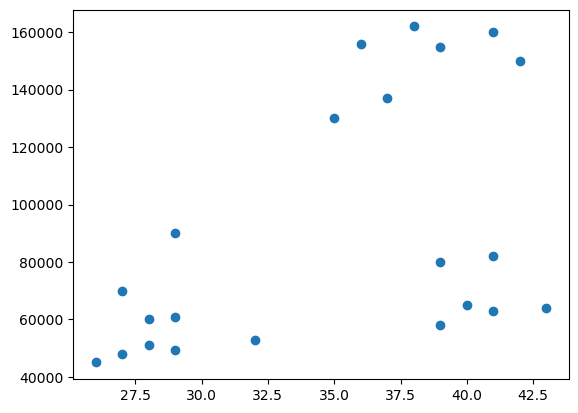

In [4]:
plt.scatter(df['Age'],df['Income($)'])


In [5]:
#Algo
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
#Train
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [13]:
#create new column: cluster
df['cluster']= y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


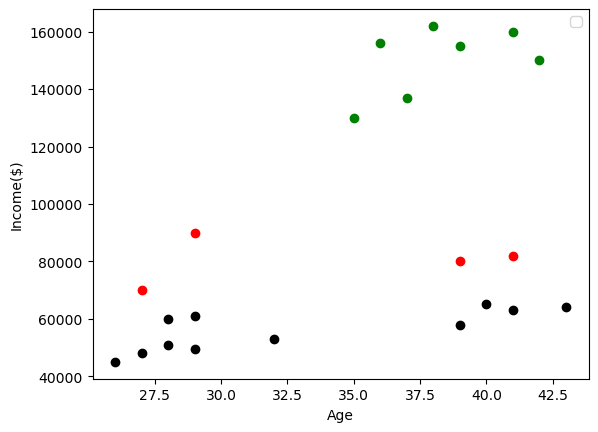

In [14]:
#plot cluster(3-clusters)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'],color='green')
plt.scatter(df2.Age, df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [17]:
#NOTE:  above is not scaled properly hence we have improper clusters, hence we use minmax scaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])  # Ensure it's passed as a 2D array
df['Income($)'] = scaler.transform(df[['Income($)']])  # Apply transformation

# Display the transformed DataFrame
print(df)

        Name  Age  Income($)  cluster
0        Rob   27   0.213675        1
1    Michael   29   0.384615        1
2      Mohan   29   0.136752        2
3     Ismail   28   0.128205        2
4       Kory   42   0.897436        0
5     Gautam   39   0.940171        0
6      David   41   0.982906        0
7     Andrea   38   1.000000        0
8       Brad   36   0.948718        0
9   Angelina   35   0.726496        0
10    Donald   37   0.786325        0
11       Tom   26   0.000000        2
12    Arnold   27   0.025641        2
13     Jared   28   0.051282        2
14     Stark   29   0.038462        2
15    Ranbir   32   0.068376        2
16    Dipika   40   0.170940        2
17  Priyanka   41   0.153846        2
18      Nick   43   0.162393        2
19      Alia   39   0.299145        1
20       Sid   41   0.316239        1
21     Abdul   39   0.111111        2


In [19]:
# Fit the scaler and transform the 'Age' column
scaler.fit(df[['Age']])  # Use double brackets to provide a 2D array
df['Age'] = scaler.transform(df[['Age']])  # Apply transformation and update the column

# Display the first few rows of the DataFrame
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [20]:
#Algo
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


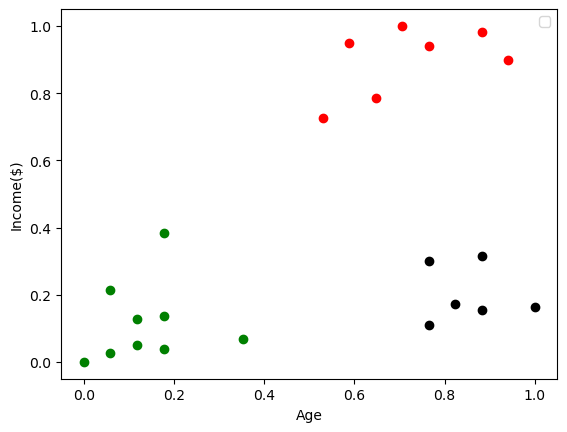

In [21]:
#plot cluster(3-clusters)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'],color='green')
plt.scatter(df2.Age, df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()